## **Import libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings("ignore")
import datetime


## **Load data**

In [2]:
df = pd.read_csv('Sales.csv')
df.head(10)

,OrderNumber,Sales Channel,WarehouseCode,ProcuredDate,OrderDate,ShipDate,DeliveryDate,CurrencyCode,_SalesTeamID,_CustomerID,_StoreID,_ProductID,Order Quantity,Discount Applied,Unit Price,Unit Cost
0,SO - 000101,In-Store,WARE-UHY1004,2017-12-31,2018-05-31,2018-06-14,2018-06-19,USD,6,15,259,12,5,0.075,1963.1,1001.18
1,SO - 000102,Online,WARE-NMK1003,2017-12-31,2018-05-31,2018-06-22,2018-07-02,USD,14,20,196,27,3,0.075,3939.6,3348.66
2,SO - 000103,Distributor,WARE-UHY1004,2017-12-31,2018-05-31,2018-06-21,2018-07-01,USD,21,16,213,16,1,0.050,1775.5,781.22
3,SO - 000104,Wholesale,WARE-NMK1003,2017-12-31,2018-05-31,2018-06-02,2018-06-07,USD,28,48,107,23,8,0.075,2324.9,1464.69
4,SO - 000105,Distributor,WARE-NMK1003,2018-04-10,2018-05-31,2018-06-16,2018-06-26,USD,22,49,111,26,8,0.100,1822.4,1476.14
5,SO - 000106,Online,WARE-PUJ1005,2017-12-31,2018-05-31,2018-06-08,2018-06-13,USD,12,21,285,1,5,0.050,1038.5,446.56
6,SO - 000107,In-Store,WARE-XYS1001,2017-12-31,2018-05-31,2018-06-08,2018-06-14,USD,10,14,6,5,4,0.150,1192.6,536.67
7,SO - 000108,In-Store,WARE-PUJ1005,2018-04-10,2018-05-31,2018-06-26,2018-07-01,USD,6,9,280,46,5,0.050,1815.7,1525.19
8,SO - 000109,In-Store,WARE-PUJ1005,2017-12-31,2018-06-01,2018-06-16,2018-06-21,USD,4,9,299,47,4,0.300,3879.3,2211.20
9,SO - 000110,In-Store,WARE-UHY1004,2017-12-31,2018-06-01,2018-06-29,2018-07-01,USD,10,33,261,13,8,0.050,1956.4,1212.97


## **Data Exploration**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7991 entries, 0 to 7990
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   OrderNumber       7991 non-null   object 
 1   Sales Channel     7991 non-null   object 
 2   WarehouseCode     7991 non-null   object 
 3   ProcuredDate      7991 non-null   object 
 4   OrderDate         7991 non-null   object 
 5   ShipDate          7991 non-null   object 
 6   DeliveryDate      7991 non-null   object 
 7   CurrencyCode      7991 non-null   object 
 8   _SalesTeamID      7991 non-null   int64  
 9   _CustomerID       7991 non-null   int64  
 10  _StoreID          7991 non-null   int64  
 11  _ProductID        7991 non-null   int64  
 12  Order Quantity    7991 non-null   int64  
 13  Discount Applied  7991 non-null   float64
 14  Unit Price        7991 non-null   float64
 15  Unit Cost         7991 non-null   float64
dtypes: float64(3), int64(5), object(8)
memory 

In [4]:
df.describe()

,_SalesTeamID,_CustomerID,_StoreID,_ProductID,Order Quantity,Discount Applied,Unit Price,Unit Cost
count,7991.000000,7991.000000,7991.000000,7991.000000,7991.000000,7991.000000,7991.000000,7991.000000
mean,14.384307,25.457014,183.850081,23.771743,4.525341,0.114394,2284.536504,1431.911513
std,7.986086,14.414883,105.903946,13.526545,2.312631,0.085570,1673.096364,1112.413063
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.050000,167.500000,68.680000
25%,8.000000,13.000000,91.000000,12.000000,3.000000,0.050000,1031.800000,606.120000
50%,14.000000,25.000000,183.000000,24.000000,5.000000,0.075000,1849.200000,1080.580000
75%,21.000000,38.000000,276.000000,36.000000,7.000000,0.150000,3611.300000,2040.250000
max,28.000000,50.000000,367.000000,47.000000,8.000000,0.400000,6566.000000,5498.560000


In [5]:
# Get categorical columns and numerical columns
categorical_cols = [feature for feature in df.columns if df[feature].dtype == "O"]
numerical_cols = [feature for feature in df.columns if df[feature].dtype != "O"]
print('Categorical columns:' ,categorical_cols, "\nNumerical columns: ", numerical_cols)

Categorical columns: ['OrderNumber', 'Sales Channel', 'WarehouseCode', 'ProcuredDate', 'OrderDate', 'ShipDate', 'DeliveryDate', 'CurrencyCode'] 
Numerical columns:  ['_SalesTeamID', '_CustomerID', '_StoreID', '_ProductID', 'Order Quantity', 'Discount Applied', 'Unit Price', 'Unit Cost']


In [6]:
# Group categorical features
categorical_data = df[categorical_cols]
categorical_counts = categorical_data.nunique()
print("\nCategorical Features Counts:")
print(categorical_counts)


Categorical Features Counts:
OrderNumber      7991
Sales Channel       4
WarehouseCode       6
ProcuredDate       11
OrderDate         945
ShipDate          966
DeliveryDate      966
CurrencyCode        1
dtype: int64


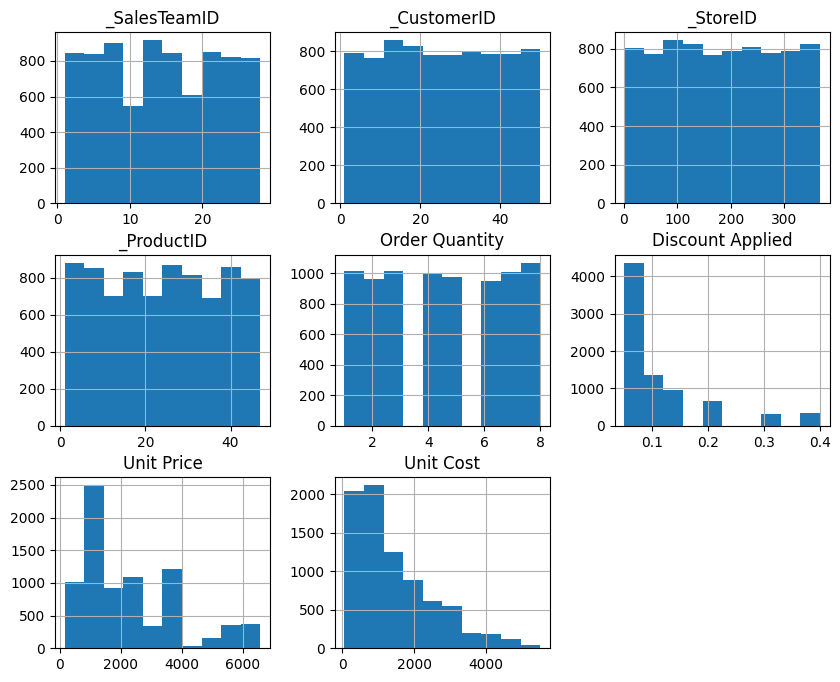

In [7]:
df.hist(figsize=(10, 8))
plt.show()

In [8]:
# Check null
df.isnull().sum()

OrderNumber         0
Sales Channel       0
WarehouseCode       0
ProcuredDate        0
OrderDate           0
ShipDate            0
DeliveryDate        0
CurrencyCode        0
_SalesTeamID        0
_CustomerID         0
_StoreID            0
_ProductID          0
Order Quantity      0
Discount Applied    0
Unit Price          0
Unit Cost           0
dtype: int64

In [9]:
# Check duplicate
df.duplicated().sum()

0

## **Data Preprocessing**

In [10]:
# Convert date columns to datetime type
date_columns = ['ProcuredDate', 'OrderDate', 'ShipDate', 'DeliveryDate']
for col in date_columns:
    df[col] = pd.to_datetime(df[col])


In [11]:
print("\nDataFrame Info After Date Conversion:")
df.info()


DataFrame Info After Date Conversion:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7991 entries, 0 to 7990
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   OrderNumber       7991 non-null   object        
 1   Sales Channel     7991 non-null   object        
 2   WarehouseCode     7991 non-null   object        
 3   ProcuredDate      7991 non-null   datetime64[ns]
 4   OrderDate         7991 non-null   datetime64[ns]
 5   ShipDate          7991 non-null   datetime64[ns]
 6   DeliveryDate      7991 non-null   datetime64[ns]
 7   CurrencyCode      7991 non-null   object        
 8   _SalesTeamID      7991 non-null   int64         
 9   _CustomerID       7991 non-null   int64         
 10  _StoreID          7991 non-null   int64         
 11  _ProductID        7991 non-null   int64         
 12  Order Quantity    7991 non-null   int64         
 13  Discount Applied  7991 non-null   float

In [12]:
# Create calculated columns
df['Revenue'] = df['Order Quantity'] * df['Unit Price'] * (1 - df['Discount Applied'])

In [13]:
# Create new columns for month and year from OrderDate
df['OrderDay'] = df['OrderDate'].dt.day
df['OrderMonth'] = df['OrderDate'].dt.month
df['OrderYear'] = df['OrderDate'].dt.year

In [14]:
df.head()

,OrderNumber,Sales Channel,WarehouseCode,ProcuredDate,OrderDate,ShipDate,DeliveryDate,CurrencyCode,_SalesTeamID,_CustomerID,_StoreID,_ProductID,Order Quantity,Discount Applied,Unit Price,Unit Cost,Revenue,OrderDay,OrderMonth,OrderYear
0,SO - 000101,In-Store,WARE-UHY1004,2017-12-31,2018-05-31,2018-06-14,2018-06-19,USD,6,15,259,12,5,0.075,1963.1,1001.18,9079.3375,31,5,2018
1,SO - 000102,Online,WARE-NMK1003,2017-12-31,2018-05-31,2018-06-22,2018-07-02,USD,14,20,196,27,3,0.075,3939.6,3348.66,10932.3900,31,5,2018
2,SO - 000103,Distributor,WARE-UHY1004,2017-12-31,2018-05-31,2018-06-21,2018-07-01,USD,21,16,213,16,1,0.050,1775.5,781.22,1686.7250,31,5,2018
3,SO - 000104,Wholesale,WARE-NMK1003,2017-12-31,2018-05-31,2018-06-02,2018-06-07,USD,28,48,107,23,8,0.075,2324.9,1464.69,17204.2600,31,5,2018
4,SO - 000105,Distributor,WARE-NMK1003,2018-04-10,2018-05-31,2018-06-16,2018-06-26,USD,22,49,111,26,8,0.100,1822.4,1476.14,13121.2800,31,5,2018


#### **Create a new DataFrame named customers**

In [15]:
# To create a new DataFrame named customers with columns CustomerID, Number of Orders, and Sum Order Quantity 
customers = df.groupby('_CustomerID').agg(
    Orders = pd.NamedAgg(column='OrderNumber', aggfunc='count'),
    Revenue = pd.NamedAgg(column='Revenue', aggfunc='sum')
).reset_index()

customers['Revenue'] = customers['Revenue'].round(2)

In [16]:
customers.head()

,_CustomerID,Orders,Revenue
0,1,152,1175020.71
1,2,135,1179320.43
2,3,181,1628232.49
3,4,167,1569467.63
4,5,159,1426164.01


#### **Create a new DataFrame named stores**

In [17]:
# create a new DataFrame named stores with columns StoreID, Number of Orders, and Sum Order Quantity
stores = df.groupby('_StoreID').agg(
    OrderQuantity = pd.NamedAgg(column='Order Quantity', aggfunc='sum'),
    Revenue = pd.NamedAgg(column='Revenue', aggfunc='sum')
).reset_index()

stores['Revenue'] = stores['Revenue'].round(2)

In [18]:
stores.head()

,_StoreID,OrderQuantity,Revenue
0,1,122,249113.20
1,2,93,188888.08
2,3,45,100960.79
3,4,68,138305.59
4,5,74,95235.64


## **Data Analysis**

In [19]:
df[['Sales Channel', 'OrderYear', 'Order Quantity','Revenue']].groupby(['Sales Channel', 'OrderYear']).sum().round(2)

Order Quantity      Revenue
Sales Channel OrderYear                             
Distributor   2018                 1519   3215703.86
              2019                 2161   4621091.00
              2020                 2607   5332352.78
In-Store      2018                 3576   7220152.16
              2019                 5583  11558109.20
              2020                 5719  11324643.34
Online        2018                 2460   4917990.78
              2019                 4236   8346061.70
              2020                 4201   8434506.38
Wholesale     2018                  927   1748786.26
              2019                 1657   3329033.69
              2020                 1516   3094948.59

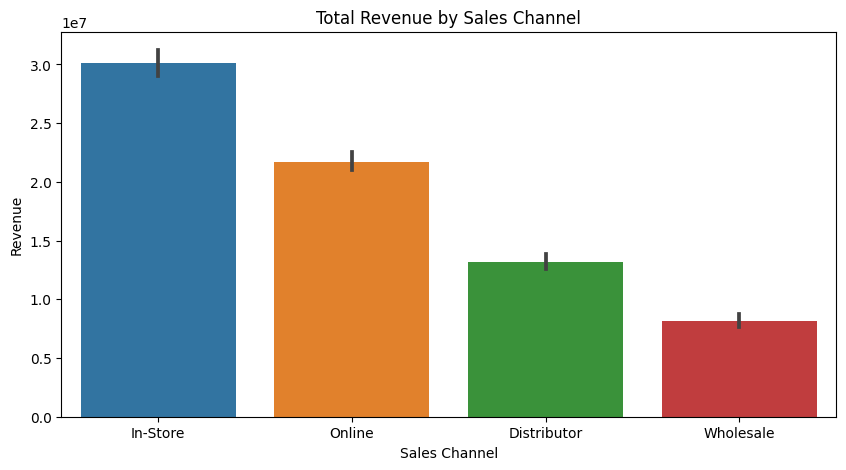

In [20]:
# Total Revenue by Sales Channel
plt.figure(figsize=(10,5))
sns.barplot(x='Sales Channel', y='Revenue', data=df, estimator=np.sum)
plt.title('Total Revenue by Sales Channel')
plt.show()

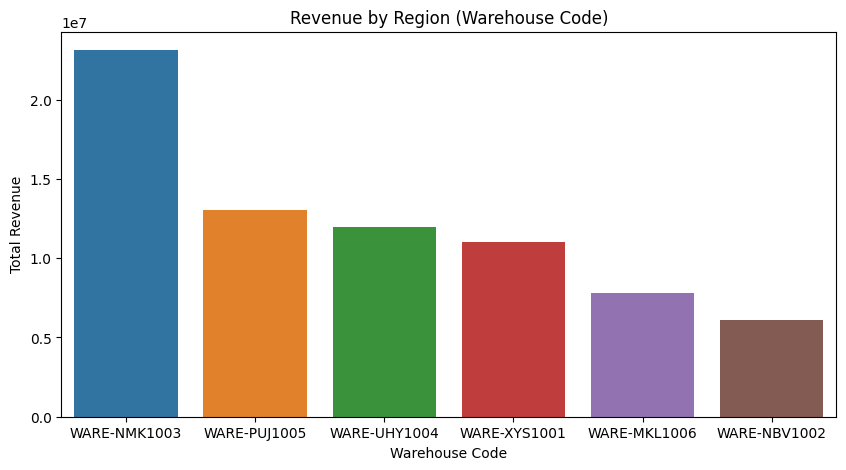

In [21]:
# Revenue by Region (assuming warehouse code represents region)
warehouse_revenue = df.groupby('WarehouseCode')['Revenue'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=warehouse_revenue.index, y=warehouse_revenue.values)
plt.title('Revenue by Region (Warehouse Code)')
plt.xlabel('Warehouse Code')
plt.ylabel('Total Revenue')
plt.show()

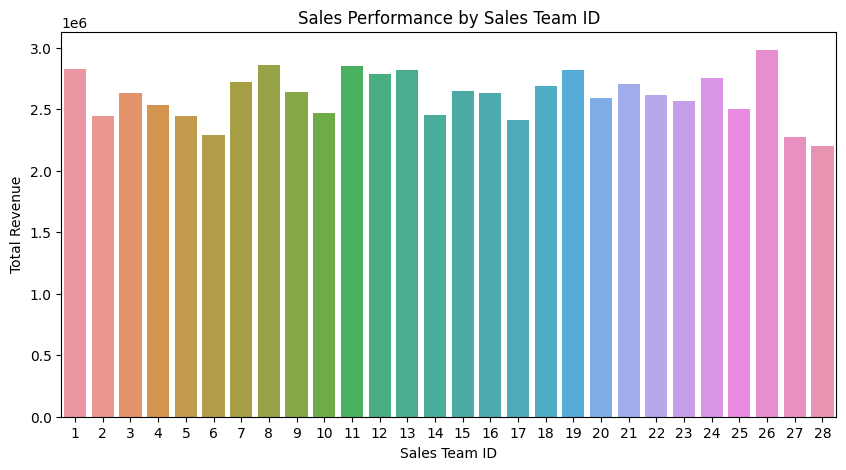

In [22]:
# Sales Team Performance by Sales Team ID
sales_team_performance = df.groupby('_SalesTeamID')['Revenue'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=sales_team_performance.index, y=sales_team_performance.values)
plt.title('Sales Performance by Sales Team ID')
plt.xlabel('Sales Team ID')
plt.ylabel('Total Revenue')
plt.show()

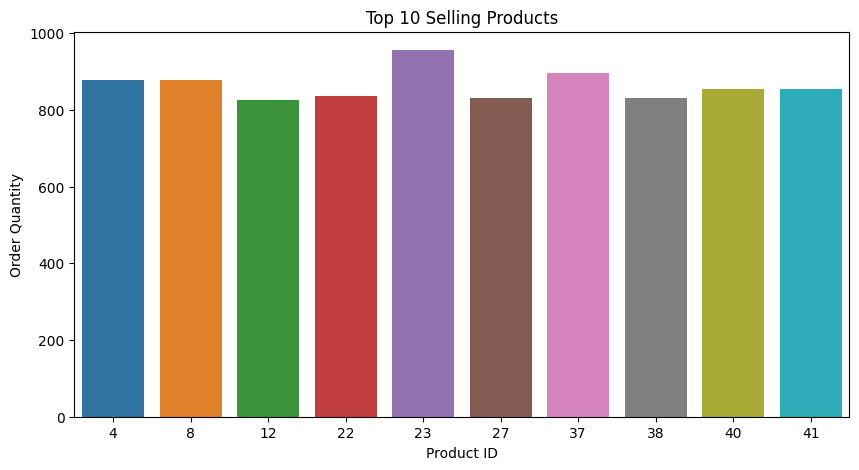

In [23]:
# Top Selling Products
top_products = df.groupby('_ProductID')['Order Quantity'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_products.index, y=top_products.values)
plt.title('Top 10 Selling Products')
plt.xlabel('Product ID')
plt.ylabel('Order Quantity')
plt.show()

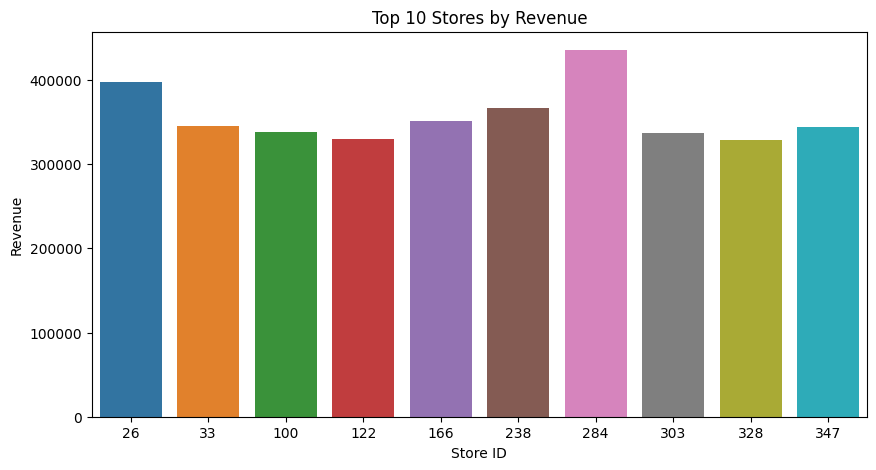

In [24]:
# Aggregate revenue by store
store_revenue = df.groupby('_StoreID')['Revenue'].sum().sort_values(ascending=False).head(10)

# Plot the data
plt.figure(figsize=(10, 5))
sns.barplot(x=store_revenue.index, y=store_revenue.values)

plt.title('Top 10 Stores by Revenue')
plt.xlabel('Store ID')
plt.ylabel('Revenue')

plt.show()

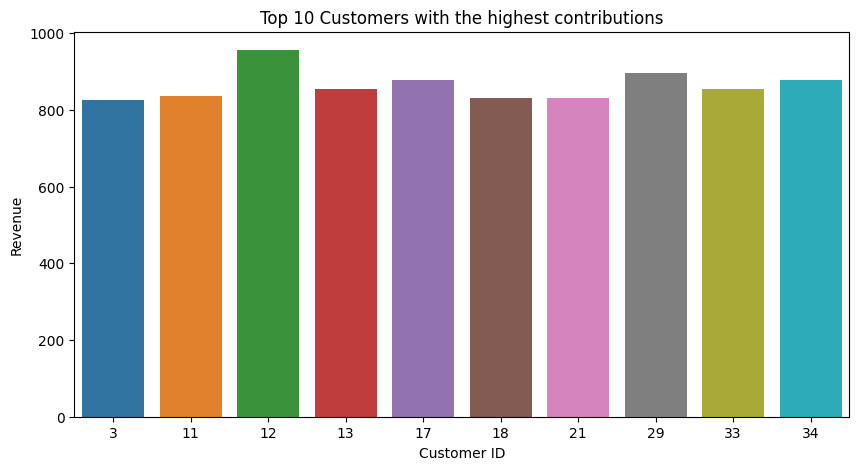

In [25]:
# Top 10 Customers with the highest contributions
top_customers = df.groupby('_CustomerID')['Revenue'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_customers.index, y=top_products.values)
plt.title('Top 10 Customers with the highest contributions')
plt.xlabel('Customer ID')
plt.ylabel('Revenue')
plt.show()

<Figure size 1200x720 with 0 Axes>

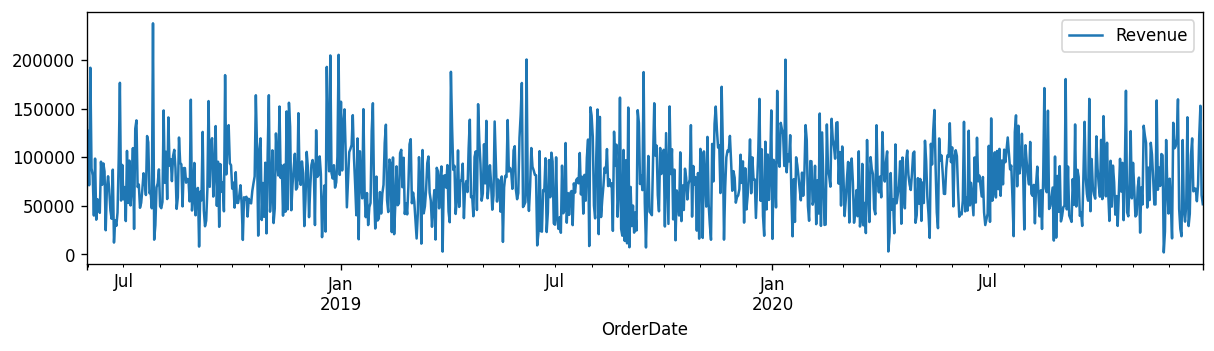

In [364]:
# Revenue
dately_revenue = df.groupby(['OrderDate'])['Revenue'].sum().reset_index()
dately_revenue.set_index('OrderDate', inplace=True)


plt.figure(figsize=(10,6))
dately_revenue.plot(subplots=True, layout=(2,1))
plt.show()

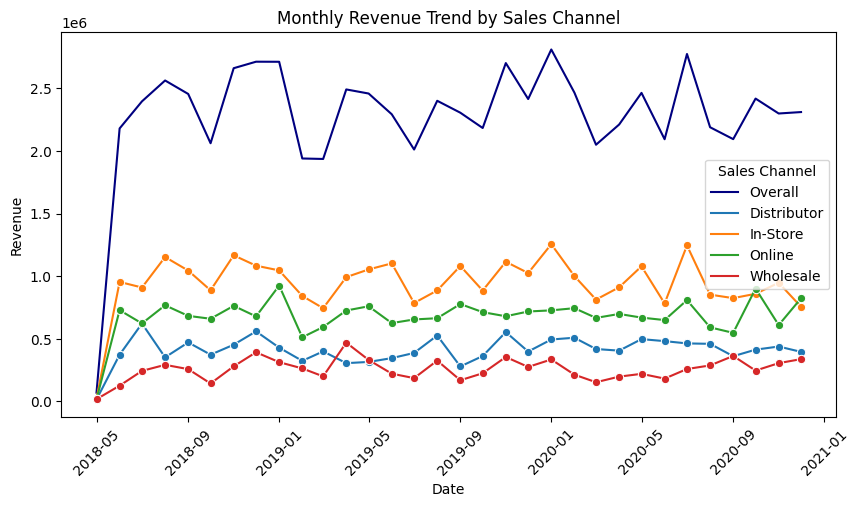

In [26]:
# Monthly Revenue Trend
monthly_revenue = df.groupby(['OrderYear', 'OrderMonth'])['Revenue'].sum().reset_index()
monthly_revenue = monthly_revenue.rename(columns={'OrderYear': 'year', 'OrderMonth': 'month'})
monthly_revenue['Date'] = pd.to_datetime(monthly_revenue.assign(day=1)[['year', 'month', 'day']])

# Group by OrderYear, OrderMonth, and SalesTeamID
monthly_revenue_channel = df.groupby(['OrderYear', 'OrderMonth', 'Sales Channel'])['Revenue'].sum().reset_index()
monthly_revenue_channel = monthly_revenue_channel.rename(columns={'OrderYear': 'year', 'OrderMonth': 'month'})
monthly_revenue_channel['Date'] = pd.to_datetime(monthly_revenue_channel.assign(day=1)[['year', 'month', 'day']])


plt.figure(figsize=(10, 5))
overall_plot = sns.lineplot(x='Date', y='Revenue', data=monthly_revenue, color='navy', label='Overall', linestyle='-')
sns.lineplot(x='Date', y='Revenue', hue='Sales Channel', data=monthly_revenue_channel, marker='o')
handles, labels = overall_plot.get_legend_handles_labels()
overall_plot.legend(handles=handles, labels=labels, title='Sales Channel')
plt.title('Monthly Revenue Trend by Sales Channel')
plt.ylabel('Revenue')
plt.xticks(rotation=45)

plt.show()

## **Features Engineering**

In [27]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [28]:
# Perform label encoding on each categorical feature
for feature in ['Sales Channel' , 'WarehouseCode']:
    df[feature] = encoder.fit_transform(categorical_data[feature])

In [29]:
# Print the updated DataFrame
df.head()

,OrderNumber,Sales Channel,WarehouseCode,ProcuredDate,OrderDate,ShipDate,DeliveryDate,CurrencyCode,_SalesTeamID,_CustomerID,_StoreID,_ProductID,Order Quantity,Discount Applied,Unit Price,Unit Cost,Revenue,OrderDay,OrderMonth,OrderYear
0,SO - 000101,1,4,2017-12-31,2018-05-31,2018-06-14,2018-06-19,USD,6,15,259,12,5,0.075,1963.1,1001.18,9079.3375,31,5,2018
1,SO - 000102,2,2,2017-12-31,2018-05-31,2018-06-22,2018-07-02,USD,14,20,196,27,3,0.075,3939.6,3348.66,10932.3900,31,5,2018
2,SO - 000103,0,4,2017-12-31,2018-05-31,2018-06-21,2018-07-01,USD,21,16,213,16,1,0.050,1775.5,781.22,1686.7250,31,5,2018
3,SO - 000104,3,2,2017-12-31,2018-05-31,2018-06-02,2018-06-07,USD,28,48,107,23,8,0.075,2324.9,1464.69,17204.2600,31,5,2018
4,SO - 000105,0,2,2018-04-10,2018-05-31,2018-06-16,2018-06-26,USD,22,49,111,26,8,0.100,1822.4,1476.14,13121.2800,31,5,2018


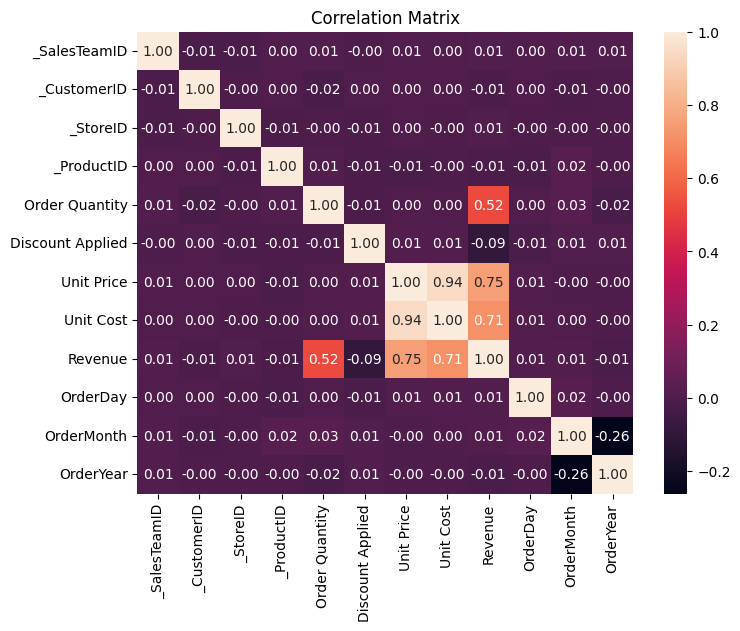

In [30]:
numeric_cols = [x for x in df.columns if df.dtypes[x] in ('int64', 'float64')]
# Show heatmap after normalized data
corr_matrix = df[numeric_cols].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

## **Clustering Cutomers**

In [31]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [32]:
customers.head()

,_CustomerID,Orders,Revenue
0,1,152,1175020.71
1,2,135,1179320.43
2,3,181,1628232.49
3,4,167,1569467.63
4,5,159,1426164.01


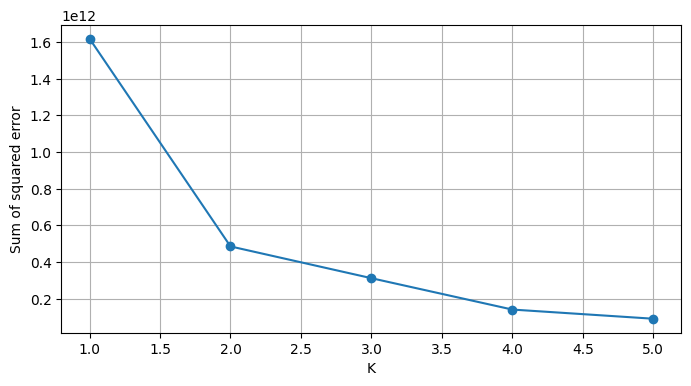

In [33]:
sse = []
k_rng = range(1, 6, 1)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(customers)
    sse.append(km.inertia_)
plt.figure(figsize = (8,4))    
plt.plot(k_rng,sse,marker="o")
plt.xlabel("K")
plt.grid()
plt.ylabel("Sum of squared error")
plt.show()

In [34]:
kmeans = KMeans(n_clusters= 3).fit(customers)
customers['cluster'] = kmeans.predict(customers)

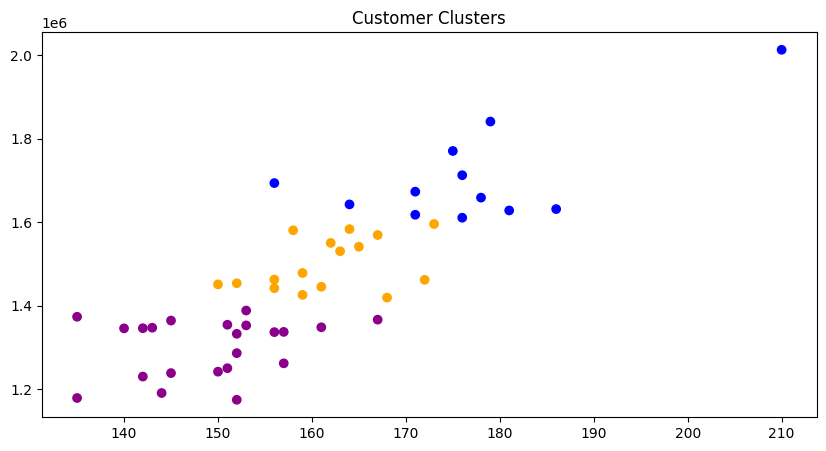

In [35]:
plt.figure(figsize=(10, 5))
plt.scatter(customers.iloc[:,1],customers.iloc[:,2], c=customers['cluster'], cmap=ListedColormap(['orange', 'blue', 'darkmagenta']))
plt.title('Customer Clusters')
plt.show()

**Observations:**
- Blue Cluster: Customers in this cluster have the lowest orders and revenue. Orders range from about 135 to 170, and revenue ranges from about 1.2 million to 1.4 million.
- Orange Cluster: Customers in this cluster have moderate orders and revenue. Orders range from about 150 to 170, and revenue ranges from about 1.3 million to 1.6 million.
- Purple Cluster: Customers in this cluster have the highest orders and revenue. Orders range from about 165 to 210, and revenue ranges from about 1.4 million to 2 million.

**Identification of Potential:**

- Blue Cluster: These customers have the potential to be nurtured into higher value segments with targeted strategies.
- Orange Cluster: These customers are the growth segment, showing potential to move into the high-value category.
- Purple Cluster: These are the most valuable customers who should be given top priority in retention strategies.

## **Clustering Store**

In [36]:
stores.head()

,_StoreID,OrderQuantity,Revenue
0,1,122,249113.20
1,2,93,188888.08
2,3,45,100960.79
3,4,68,138305.59
4,5,74,95235.64


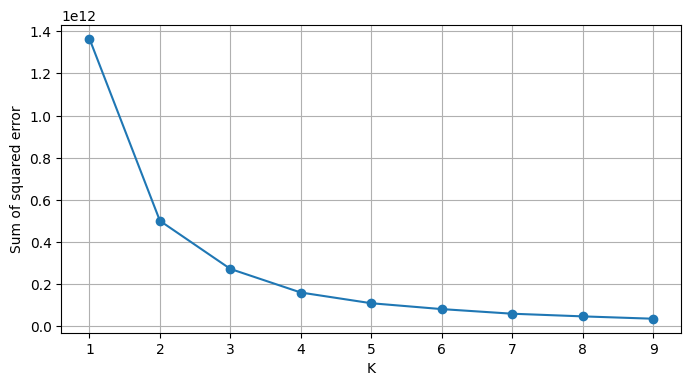

In [37]:
sse = []
k_rng = range(1, 10, 1)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(stores)
    sse.append(km.inertia_)
plt.figure(figsize = (8,4))    
plt.plot(k_rng,sse,marker="o")
plt.xlabel("K")
plt.grid()
plt.ylabel("Sum of squared error")
plt.show()

In [38]:
kmeans = KMeans(n_clusters= 4).fit(stores)
stores['cluster'] = kmeans.predict(stores)

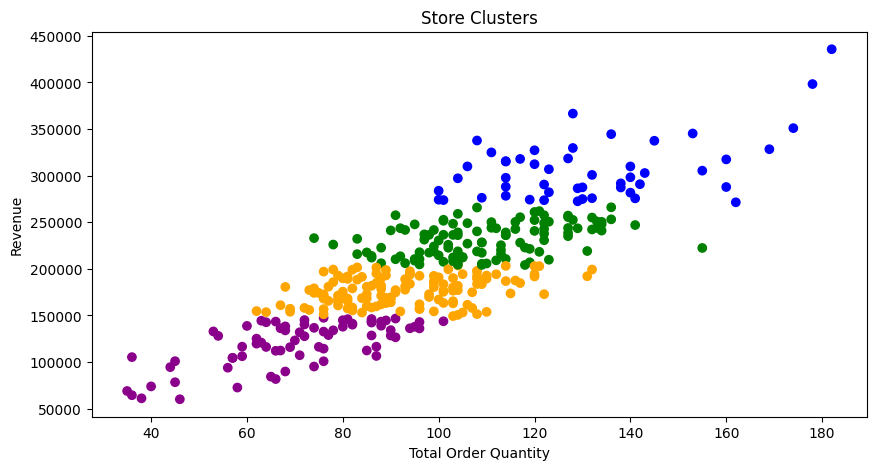

In [39]:
plt.figure(figsize=(10, 5))
plt.scatter(stores.iloc[:,1],stores.iloc[:,2], c=stores['cluster'], cmap=ListedColormap(['orange', 'blue', 'darkmagenta','green']))
plt.title('Store Clusters')
plt.xlabel('Total Order Quantity')
plt.ylabel('Revenue')
plt.show()

**Observations:**  
- Green Cluster: Stores with the lowest order quantities (approximately 30 to 80) and lower revenues (approximately 50,000 to 150,000). Represents low-performing stores in terms of both order quantity and revenue. These stores may need more support or different strategies to boost their performance.
- Orange Cluster: Stores with moderate order quantities (approximately 50 to 110) and moderate revenues (approximately 100,000 to 250,000). Represents mid-tier stores with moderate performance. Strategies for this group could focus on increasing order quantities and/or revenue per order.
- Blue Cluster: Stores with higher order quantities (approximately 70 to 130) and higher revenues (approximately 150,000 to 300,000). Represents higher-performing stores with significant order quantities and revenues. These stores are performing well but still have room for growth.
- Purple Cluster: Stores with the highest order quantities (approximately 110 to 180) and the highest revenues (approximately 250,000 to 450,000). Represents the top-performing stores with the highest order quantities and revenues. These stores are the best performers and might benefit from strategies focused on maintaining high performance and customer retention.





## **Model Predict Unit Price**

### **Data Preparation**

In [40]:
X = df.drop(columns = ['OrderNumber','CurrencyCode','Revenue', 'Unit Price','ProcuredDate', 'OrderDate', 'ShipDate', 'DeliveryDate'])
y = df['Unit Price']

In [41]:
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size = 0.3,random_state = 23)

### **Model Linear Regression**

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [43]:
model = LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [44]:
# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model's performance using mean squared error (MSE)
# Evaluate the model
mae = mean_absolute_error(Y_test, y_pred)
mse = mean_squared_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Absolute Error: 409.0105443856382
Mean Squared Error: 318325.93914433324
R-squared: 0.8874238167179882


### **Model RandomForestRegressor**

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [46]:
model = RandomForestRegressor(random_state=42)
model.fit(X_train, Y_train)

RandomForestRegressor(random_state=42)

In [47]:
# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(Y_test, y_pred)
mse = mean_squared_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Absolute Error: 361.8645971643036
Mean Squared Error: 277123.7335196172
R-squared: 0.901995004553008


## **Model LSTM LSTM Models for Time Series Forecasting Revenue**

In [332]:
from keras.layers import LSTM, Dense, Dropout
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.utils import plot_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score

In [366]:
X = df.drop(columns = ['OrderNumber','CurrencyCode', 'Unit Price','ProcuredDate', 'OrderDate', 'ShipDate', 'DeliveryDate'])
y = df['Revenue']

In [367]:
scaler = MinMaxScaler(feature_range=(0, 1))
X_scaler = scaler.fit_transform(X)

In [368]:
timesplit= TimeSeriesSplit(n_splits=10)
for train_index, test_index in timesplit.split(X_scaler):
        X_train, X_test = X_scaler[:len(train_index)], X_scaler[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = y[:len(train_index)].ravel(), y[len(train_index): (len(train_index)+len(test_index))].ravel()


In [369]:
trainX =np.array(X_train)
testX =np.array(X_test)
X_train = trainX.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = testX.reshape(X_test.shape[0], 1, X_test.shape[1])

In [370]:
lstm = Sequential()
lstm.add(LSTM(32, input_shape=(1, trainX.shape[1]), activation='relu', return_sequences=False))
lstm.add(Dense(1))
lstm.compile(optimizer='adam', loss='mse')
lstm.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 32)                5888      
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 5921 (23.13 KB)
Trainable params: 5921 (23.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [371]:
history = lstm.fit(X_train, y_train, epochs=50, batch_size=8, verbose=1, shuffle=False)

Epoch 1/50
909/909 [==============================] - 4s 2ms/step - loss: 162336880.0000
Epoch 2/50
909/909 [==============================] - 2s 2ms/step - loss: 154125776.0000
Epoch 3/50
909/909 [==============================] - 2s 2ms/step - loss: 141639328.0000
Epoch 4/50
909/909 [==============================] - 2s 2ms/step - loss: 127236416.0000
Epoch 5/50
909/909 [==============================] - 2s 2ms/step - loss: 112497832.0000
Epoch 6/50
909/909 [==============================] - 2s 2ms/step - loss: 99037272.0000
Epoch 7/50
909/909 [==============================] - 2s 2ms/step - loss: 87988832.0000
Epoch 8/50
909/909 [==============================] - 2s 2ms/step - loss: 79765488.0000
Epoch 9/50
909/909 [==============================] - 2s 2ms/step - loss: 68733704.0000
Epoch 10/50
909/909 [==============================] - 2s 2ms/step - loss: 55254952.0000
Epoch 11/50
909/909 [==============================] - 2s 2ms/step - loss: 44766528.0000
Epoch 12/50
909/909 [====

In [372]:
y_pred= lstm.predict(X_test)

23/23 [==============================] - 0s 1ms/step


In [373]:
mse = mean_squared_error(y_test, y_pred, squared = False)
r2 = r2_score(y_test, y_pred)
print(f'Mean squared error: {mse}')
print(f'R2 score: {r2}')

Mean squared error: 197.28785338412658
R2 score: 0.9994943814394911


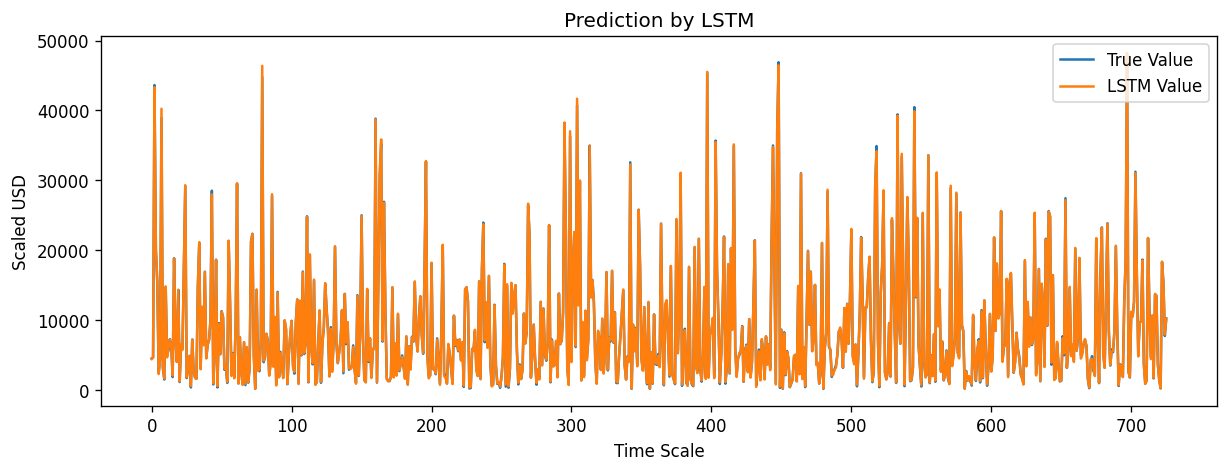

In [374]:
plt.figure(figsize = (12,4))
plt.plot(y_test, label='True Value')
plt.plot(y_pred, label='LSTM Value')
plt.title('Prediction by LSTM')
plt.xlabel('Time Scale')
plt.ylabel('Scaled USD')
plt.legend()
plt.show()

## **Model Time Series**

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_predict
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

### **Data Preparation**

In [376]:
dately_revenue = df.groupby(['OrderDate'])['Revenue'].sum().reset_index()
dately_revenue.set_index('OrderDate', inplace=True)
dately_revenue.head()


,Revenue
OrderDate,
2018-05-31,69636.2825
2018-06-01,127326.6325
2018-06-02,71238.7550
2018-06-03,192156.8375
2018-06-04,88671.1500


In [377]:
revenue_1819 = df[df['OrderYear'] != 2020]

In [378]:
revenue_train = revenue_1819.groupby(['OrderDate'])['Revenue'].sum().reset_index()
revenue_train.set_index('OrderDate', inplace=True)

In [379]:
arima_df = revenue_train

<Figure size 1200x720 with 0 Axes>

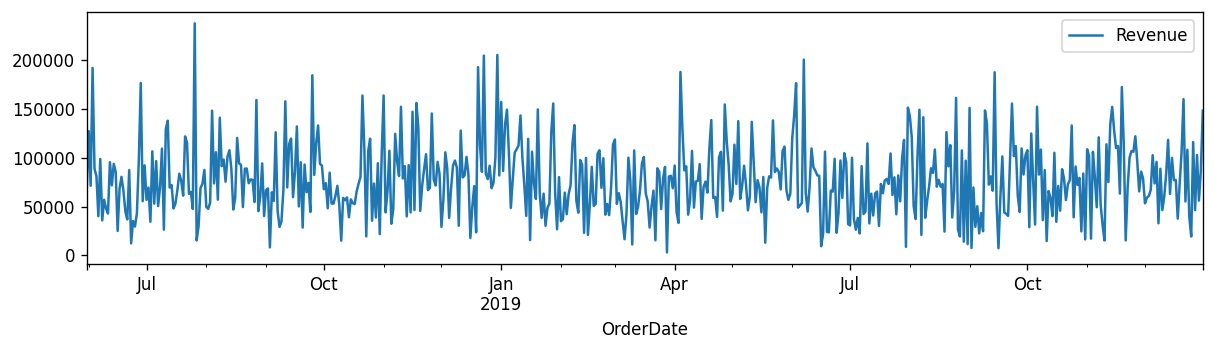

In [380]:
plt.figure(figsize=(10,6))
arima_df.plot(subplots=True, layout=(2,1))
plt.show()

### **Model ARIMA**

ADF Statistic: -24.163978885351316
p-value: 0.0
Critical Values:
   1%: -3.441694608475642
Critical Values:
   5%: -2.866544718556839
Critical Values:
   10%: -2.5694353738653684
ADF Statistic: -10.672056744194704
p-value: 4.1429491381507585e-19
Critical Values:
   1%: -3.4419770063102213
Critical Values:
   5%: -2.866669060591297
Critical Values:
   10%: -2.5695016312945413


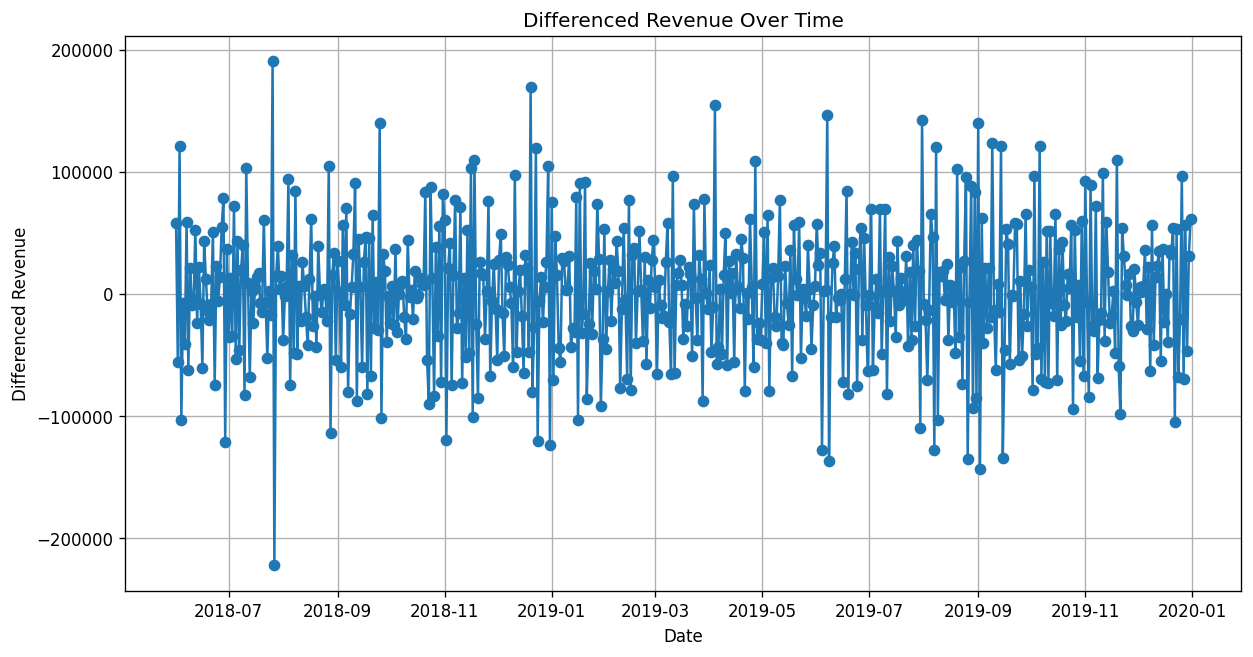

In [381]:
from statsmodels.tsa.stattools import adfuller

def check_stationarity(timeseries):
    result = adfuller(timeseries)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    for key, value in result[4].items():
        print('Critical Values:')
        print(f'   {key}: {value}')

# Check stationarity
check_stationarity(arima_df['Revenue'])

# Differencing if necessary
arima_df['Revenue_diff'] = arima_df['Revenue'].diff().dropna()
check_stationarity(arima_df['Revenue_diff'].dropna())

# Plot differenced data
plt.figure(figsize=(12, 6))
plt.plot(arima_df.index, arima_df['Revenue_diff'], marker='o')
plt.title('Differenced Revenue Over Time')
plt.xlabel('Date')
plt.ylabel('Differenced Revenue')
plt.grid(True)
plt.show()


Since the p-value is less than any common significance level (e.g., 0.01, 0.05, 0.1), you reject the null hypothesis. The highly negative ADF statistic also indicates strong evidence against the null hypothesis.

Therefore, you can conclude that the time series is stationary.

Since your series is stationary, you can use models that assume stationarity directly without further differencing (d=0).

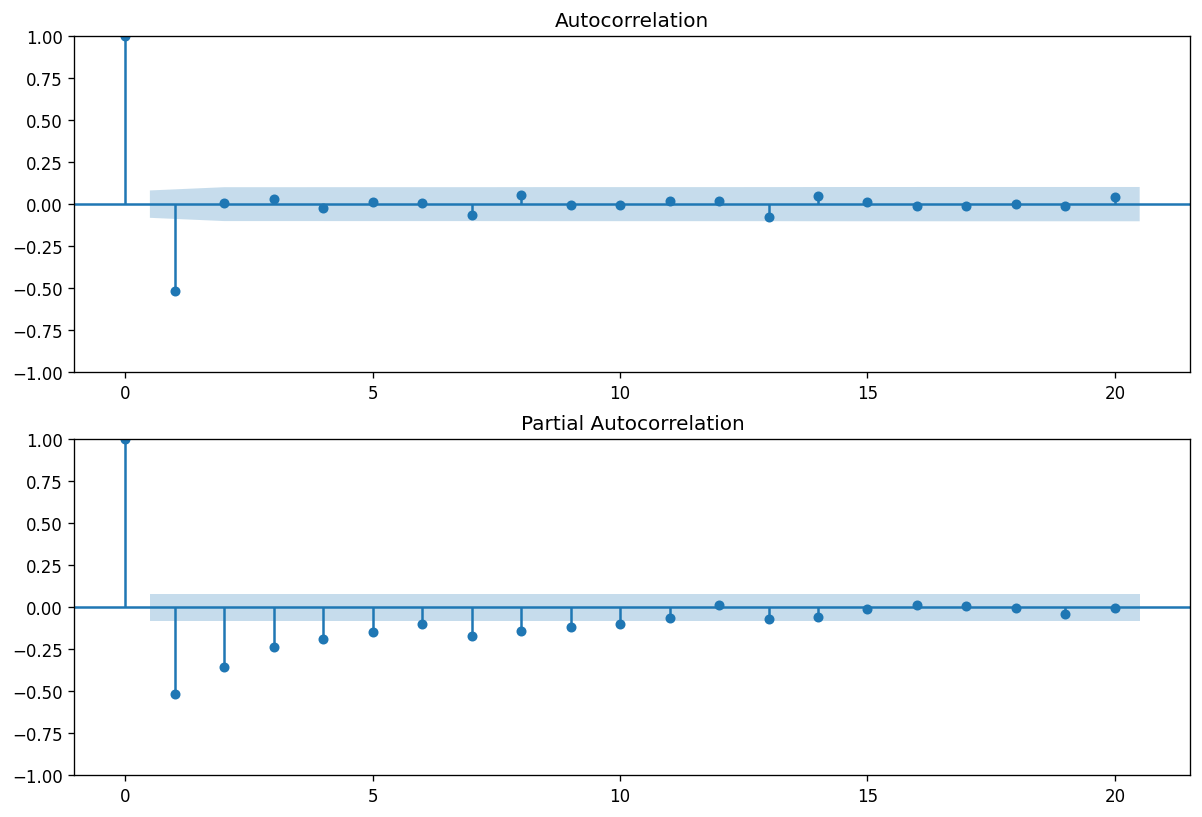

In [382]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF
fig, ax = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(arima_df['Revenue_diff'].dropna(), lags=20, ax=ax[0])
plot_pacf(arima_df['Revenue_diff'].dropna(), lags=20, ax=ax[1])
plt.show()



In the provided ACF plot:

The ACF drops to zero immediately after lag 1, indicating that there is no significant autocorrelation beyond lag 1.

From your PACF plot:

There is a significant spike at lag 1, which then quickly diminishes.
This suggests that an AR(1) model might be appropriate, meaning 𝑝 = 1.

In [383]:
from statsmodels.tsa.arima.model import ARIMA

# Define the ARIMA model
model = ARIMA(arima_df['Revenue'], order=(1,0,2))
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())


C:\Users\DELL\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\DELL\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\DELL\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                Revenue   No. Observations:                  580
Model:                 ARIMA(1, 0, 2)   Log Likelihood               -6938.180
Date:                Wed, 22 May 2024   AIC                          13886.360
Time:                        18:07:08   BIC                          13908.175
Sample:                    05-31-2018   HQIC                         13894.865
                         - 12-31-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.751e+04   2092.019     37.051      0.000    7.34e+04    8.16e+04
ar.L1          0.8947      0.117      7.626      0.000       0.665       1.125
ma.L1         -0.9113      0.124     -7.346      0.0

In [384]:
start_date = arima_df.index[-1]
end_date = monthly_revenue.index[-1]

forecast_date = [start_date + datetime.timedelta(days=x) for x in range((end_date - start_date).days + 1)]

# Create a new series with the future dates
future_series = pd.Series([None]*len(forecast_date), index=forecast_date )

# Reindex the original DataFrame to include future dates
forecast_df = arima_df.reindex(arima_df.index.union(future_series.index))



In [385]:
# Forecast the next 5 steps
forecast = model_fit.forecast(steps=366)

# Assign the forecast to the future dates in the DataFrame
forecast_df.loc[forecast_date, 'Revenue'] = forecast.values

forecast_df.drop(arima_df.index, inplace=True)

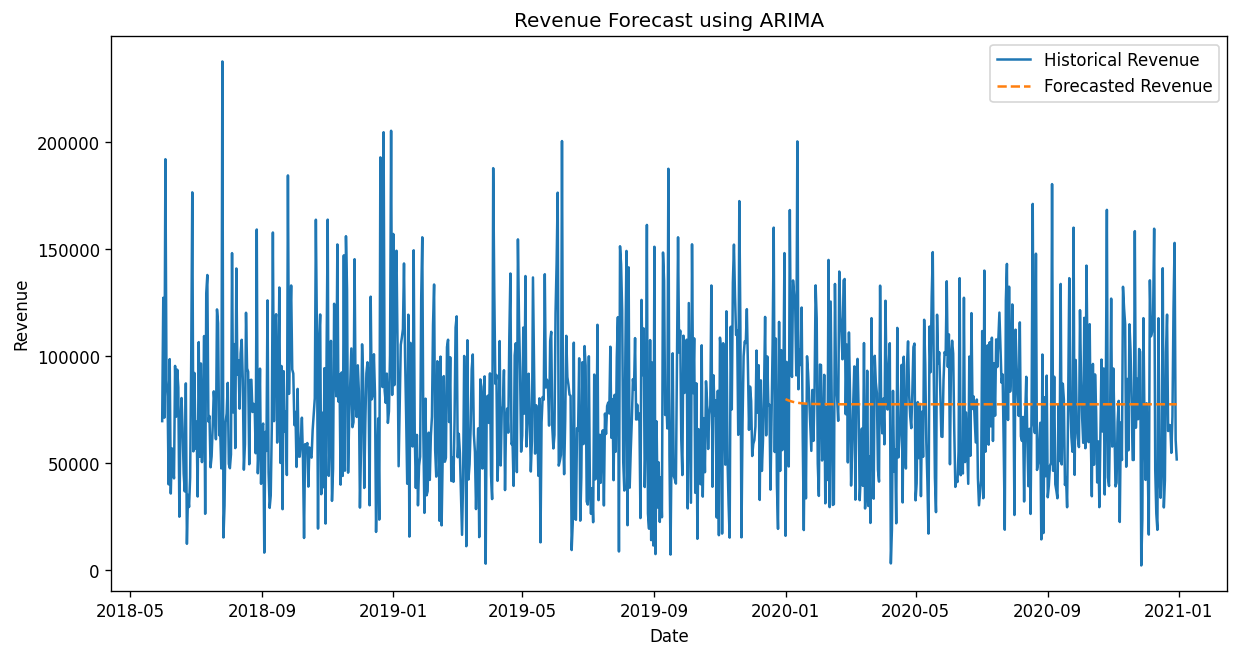

In [386]:
plt.plot(dately_revenue.index, dately_revenue['Revenue'], label='Historical Revenue')
plt.plot(forecast_df.index, forecast_df['Revenue'], label='Forecasted Revenue', linestyle='dashed')


plt.title('Revenue Forecast using ARIMA')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.legend()

# Hiển thị đồ thị
plt.show()

In [387]:
from sklearn.metrics import r2_score

y_actual = monthly_revenue.loc[forecast_df.index]['Revenue']
y_predicted = forecast_df['Revenue'].values
r2 = r2_score(y_actual, y_predicted)

print("R^2 Score:", r2)

rmse = np.sqrt(np.mean((y_actual - y_predicted)**2))

print("RMSE:", rmse)

R^2 Score: 0.0013152128168605337
RMSE: 35246.04855071568


---> **Model fail**